In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Descriptive Statistics

The dataset consists of 4600 records.

Price: Varies significantly, with a mean of approximately $551,963 and a wide range from $0 (which may indicate missing or placeholder values) to over $26 million, suggesting a diverse set of properties including potentially outliers or special cases.

Bedrooms and Bathrooms: Ranges from 0 (likely missing data) to 9 for bedrooms and 8 for bathrooms, with mean values around 3.4 and 2.16, respectively, indicating that most properties are family-sized homes.

Square Footage: Living area sizes (sqft_living) range from 370 to 13,540 sqft, highlighting a mix of small to very large homes.

Floors, Waterfront, View, and Condition: These features show a variety of property characteristics, with 'floors' ranging up to 3.5 levels, a small percentage of properties being waterfront, and a range of views and conditions.

Year Built and Renovated: Properties were built across a broad time range, from 1900 to 2014, with renovations spanning up to the dataset's most recent year.

Missing Values

There are no missing values in the dataset, as each column has 4600 non-null entries, which simplifies the preprocessing phase.

Handling the $0 prices, as they may skew analysis and model training.

Investigating properties with 0 bedrooms and bathrooms to determine if these are data entry errors or special cases.

Visualizing the distribution of key variables (e.g., price, bedrooms, bathrooms, sqft_living) to better understand their spread and identify outliers.

Analyzing the correlation between features, especially how features like sqft_living, bedrooms, and bathrooms correlate with price.

Considering feature engineering opportunities, such as creating a new feature for the age of the property or the time since the last renovation.

In [9]:
# Generate descriptive statistics
descriptive_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

(descriptive_stats, missing_values)


(              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
 count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
 mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
 std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
 min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
 25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
 50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
 75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
 max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   
 
             floors   waterfront         view    condition   sqft_above  \
 count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
 mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
 std       0.538288     0.084404     0.778405     0.677230   862.168977

c:\Users\bmcki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bmcki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bmcki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bmcki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

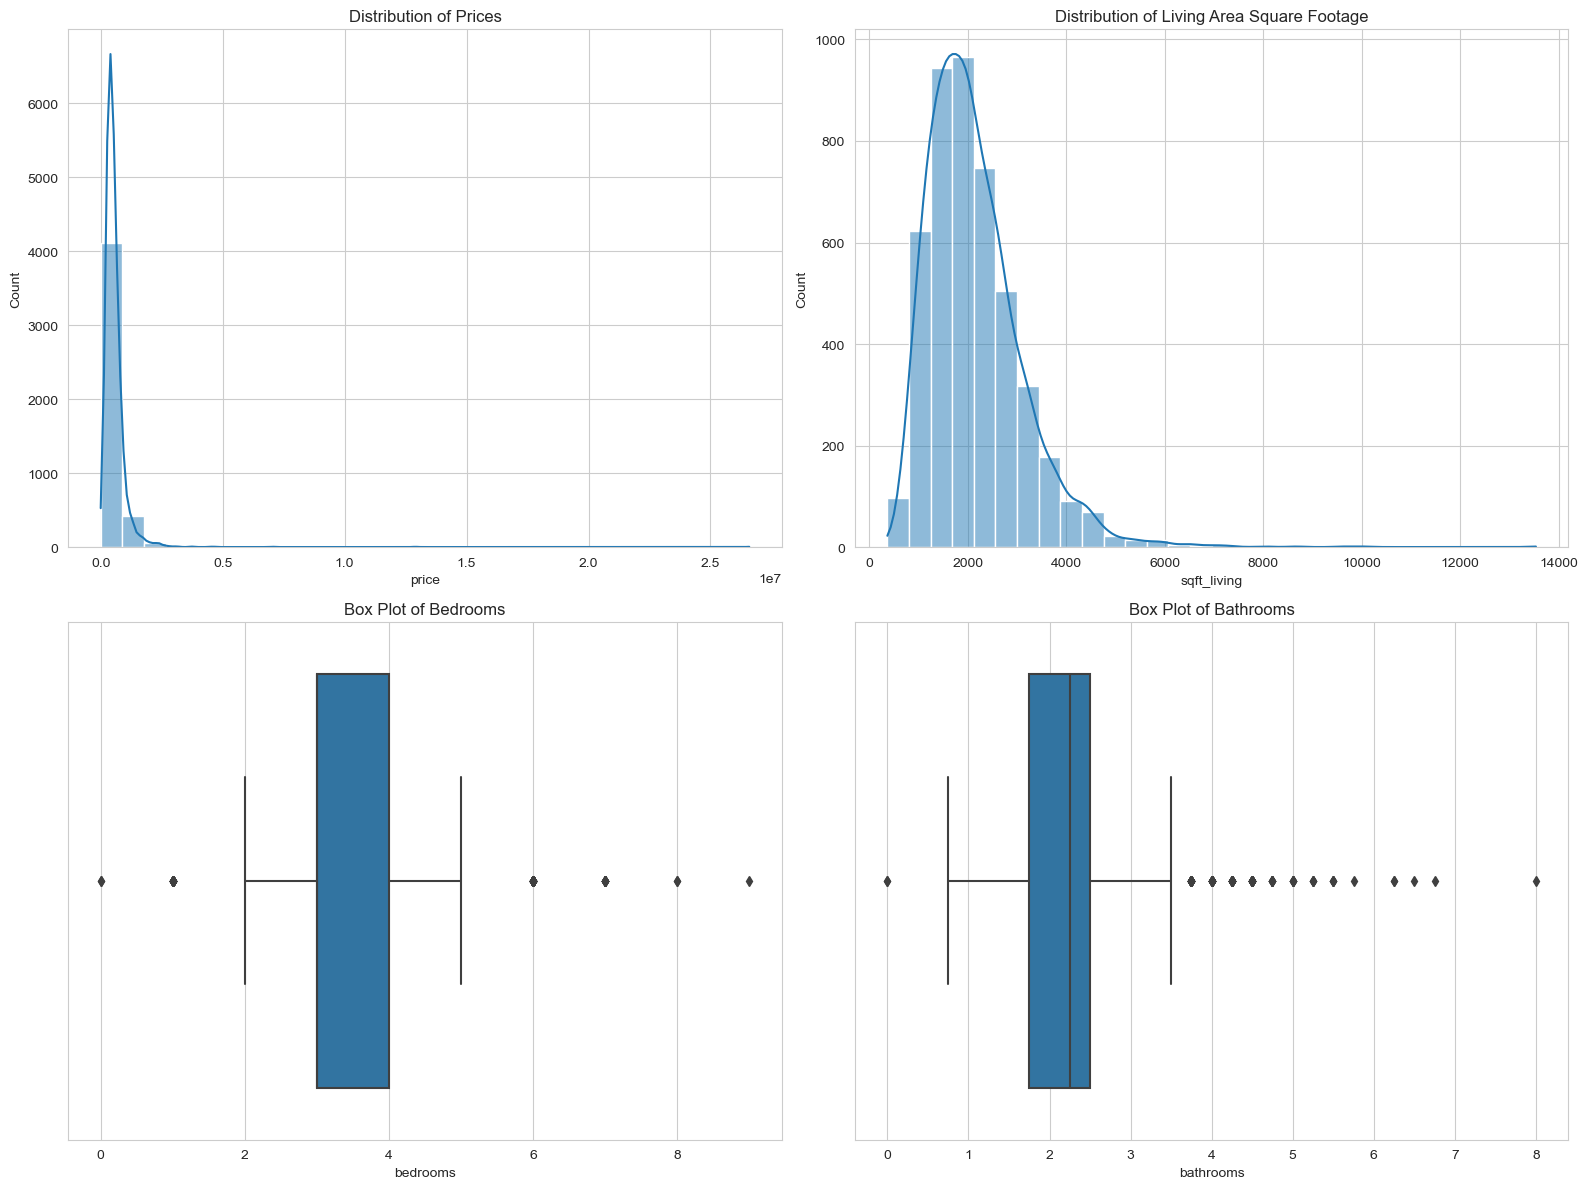

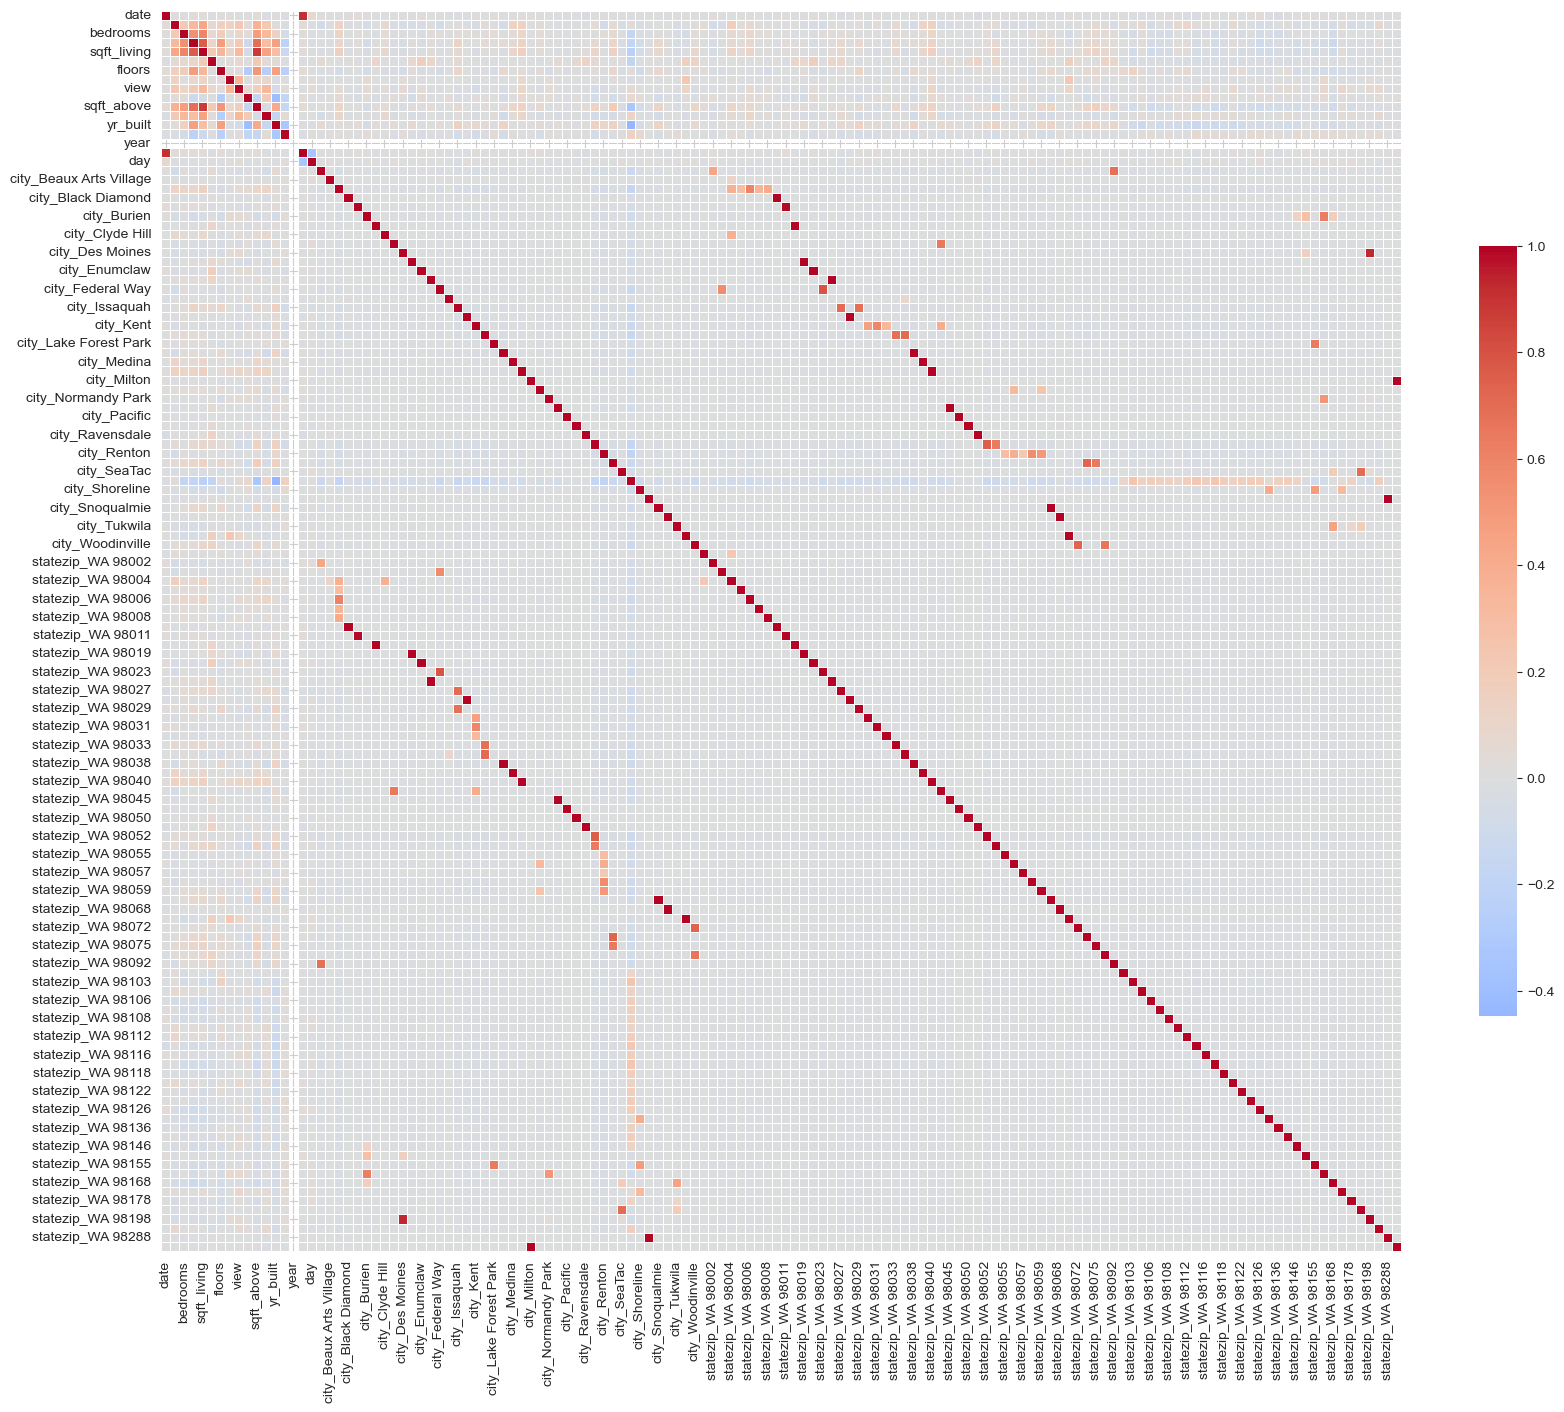

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# data = pd.read_csv('path_to_your_file.csv')  # Uncomment and modify with your actual data file path

# Assuming 'data' is your DataFrame and has been loaded

# Start by creating a copy of the data for preprocessing
data_preprocessed = data.copy()

# Convert 'date' from string to datetime format and extract year, month, and day
data_preprocessed['date'] = pd.to_datetime(data_preprocessed['date'])
data_preprocessed['year'] = data_preprocessed['date'].dt.year
data_preprocessed['month'] = data_preprocessed['date'].dt.month
data_preprocessed['day'] = data_preprocessed['date'].dt.day

# Drop columns that are not useful or could cause conversion errors
columns_to_drop = ['street', 'country']  # Add or remove columns based on your dataset and needs
data_preprocessed = data_preprocessed.drop(columns=columns_to_drop)

# Apply one-hot encoding to categorical variables
categorical_columns = ['city', 'statezip']  # Add or remove columns based on your dataset
data_preprocessed = pd.get_dummies(data_preprocessed, columns=categorical_columns, drop_first=True)

# Visualization and analysis

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare figure for multiple plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram of prices
sns.histplot(data_preprocessed['price'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Prices')

# Histogram of sqft_living
sns.histplot(data_preprocessed['sqft_living'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Living Area Square Footage')

# Box plot of bedrooms
sns.boxplot(x=data_preprocessed['bedrooms'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Bedrooms')

# Box plot of bathrooms
sns.boxplot(x=data_preprocessed['bathrooms'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Bathrooms')

plt.tight_layout()
plt.show()

# Update the correlation matrix to include new features if necessary
# Set up the matplotlib figure
plt.figure(figsize=(20, 20))  # Increase figure size

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Improve the visibility of the labels (optional)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.yticks(rotation=0)  # Ensure y labels are horizontal for readability

plt.show()


## Distribution of Prices

The histogram for the distribution of prices shows a right-skewed pattern, with a peak at the lower end of the price range and a long tail extending towards the higher prices. This suggests that while most of the homes are relatively affordable, there are a few homes with significantly higher prices, which are potential outliers. The skewness in the distribution indicates that a transformation, such as a logarithmic transformation, might be beneficial for any modeling efforts to normalize the data and potentially improve model performance.

## Living Area Square Footage

The histogram for the distribution of living area square footage reveals a similar right-skewed distribution. Most of the homes have a smaller living area, with fewer homes having a much larger living area. This skewness aligns with the price distribution, suggesting that larger homes are less common and may be priced higher, which could be an area of interest for further analysis.

## Bedrooms and Bathrooms

The box plots for bedrooms and bathrooms indicate a concentration of homes with 2 to 4 bedrooms and 1 to 3 bathrooms. Outliers are present in both features, but they are more noticeable in the number of bedrooms. These outliers might represent unusually large homes or data entry errors and should be examined further to determine the appropriate treatment for modeling.

## Correlation Matrix

The correlation matrix shows that there are positive correlations between price and features such as square footage of the living area, number of bathrooms, and square footage above ground level. This suggests that these features are important predictors of price. The living area square footage also has strong correlations with the number of bathrooms and bedrooms, which may indicate multicollinearity—a condition that can affect certain types of regression models by inflating the variance of the estimated regression coefficients.

## Recommendations for Feature Engineering and Model Selection

Feature Transformation: Due to the skewness observed in the price and square footage distributions, consider applying a logarithmic transformation to these features to reduce the impact of extreme values.

Handling Outliers: Evaluate the outliers in price, bedrooms, and bathrooms to decide on a strategy—whether to exclude them from the dataset or to cap them at a certain value—to reduce their influence on the model.

Feature Creation: New features could be engineered, such as the age of the property (calculated as the current year minus the year built) and the time since the last renovation (calculated as the current year minus the year renovated, for properties that have undergone renovations). These features could provide additional insights and predictive power.

Model Choice: Given the strong correlations observed between certain features and price, linear regression models could be a good starting point. However, it will be important to check for and address multicollinearity. Tree-based models like decision trees or random forests may be less sensitive to multicollinearity and could also handle the non-linear relationships and feature interactions well.